# Decision Trees: Regression

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Creating Height Dataset

In [6]:
import numpy as np
import pandas as pd

n = 200

height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

height_f = np.concatenate([height_pop1_f, height_pop2_f])
height_m = np.concatenate([height_pop1_m, height_pop2_m])

df_height = pd.DataFrame(
    {
        'Gender': [1 for i in range(height_f.size)] + [2 for i in range(height_m.size)],
        'Height': np.concatenate((height_f, height_m))
    }
)

# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

In [7]:
df_height.sample(3)

,Gender,Height
691,2,173.795898
67,1,156.370367
376,1,160.706976


Text(0.5, 0, 'Height (in centimeters)')

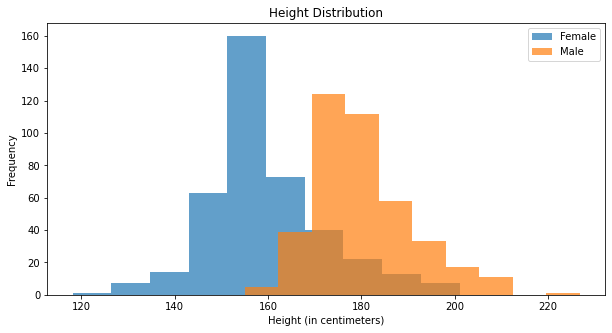

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist', 
    bins=10, alpha=0.7, ax=ax
)

# ax.set_xlim(140, 200)
ax.legend()
ax.set_title('Height Distribution')
ax.set_xlabel('Height (in centimeters)')

#fig.show()

In [9]:
# df_height['Gender (text)'] = df_height['Gender'].apply(lambda g: {1: 'F', 2: 'M'}.get(g, 'N/A'))

df_height.groupby('Gender')[['Height']].agg([np.mean, np.median]).round(1)

Height       
         mean median
Gender              
1       159.5  157.1
2       180.3  178.5

##  Splitting Data then applying the Regressor

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_height, test_size=0.3, random_state=22)

x_train = df_train[['Gender']]
x_test  = df_test[['Gender']]

y_train = df_train['Height']
y_test  = df_test['Height']

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()

clf.fit(x_train, y_train)



DecisionTreeRegressor()

In [11]:
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error


for criterion in ['mse', 'mae']:
    rgrsr = DecisionTreeRegressor(criterion=criterion)
    rgrsr.fit(x_train, y_train)

    print(f'\ncriterion={criterion}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
    
    y_test_pred = rgrsr.predict(x_test)
    
    print('MSE:', round(mean_squared_error(y_test, y_test_pred), 1))
    print('MAE:', round(mean_absolute_error(y_test, y_test_pred), 1))


criterion=mse:

|--- Gender <= 1.5
|   |--- value: [159.4]
|--- Gender >  1.5
|   |--- value: [180.6]

MSE: 125.4
MAE: 8.6

criterion=mae:

|--- Gender <= 1.5
|   |--- value: [157.1]
|--- Gender >  1.5
|   |--- value: [178.9]

MSE: 128.1
MAE: 8.3


In [12]:
y_train

230    143.113268
140    149.425527
172    146.794557
782    193.982562
406    168.104285
          ...    
491    170.508754
502    174.844204
358    168.151290
356    145.306224
132    157.795329
Name: Height, Length: 560, dtype: float64

In [13]:
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error, mean_absolute_error


for who_gets_more_weight in ['below 150', 'above 150']:
    rgrsr = DecisionTreeRegressor(criterion='mse')
    if who_gets_more_weight == 'below 150':
        sample_weight = y_train.apply(lambda h: 10 if h <= 150 else 1)
    else:
        sample_weight = y_train.apply(lambda h: 10 if h > 150 else 1)
    rgrsr.fit(x_train, y_train, sample_weight=sample_weight)

    print(f'\nEmphasis on {who_gets_more_weight}:\n')
    print(export_text(rgrsr, feature_names=['Gender'], spacing=3, decimals=1))
    
    y_test_pred = rgrsr.predict(x_test)
    
    print('MSE:', round(mean_squared_error(y_test, y_test_pred), 1))
    print('MAE:', round(mean_absolute_error(y_test, y_test_pred), 1))


Emphasis on below 150:

|--- Gender <= 1.5
|   |--- value: [150.0]
|--- Gender >  1.5
|   |--- value: [180.6]

MSE: 175.1
MAE: 9.8

Emphasis on above 150:

|--- Gender <= 1.5
|   |--- value: [162.2]
|--- Gender >  1.5
|   |--- value: [180.6]

MSE: 129.1
MAE: 9.1
